# Load and Explore the Dataset

FOr this section, we:
- Load the phishing dataset (`Phishing_Legitimate_full.csv`).
- Display its basic information.
- Check for missing values.


In [29]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Dataset/Phishing_Legitimate_full.csv")

# Display basic dataset information
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


# Data Preprocessing

- Drop the `id` column as it does not contribute to classification.
- Identify and remove highly correlated features to improve model efficiency.


In [30]:
# Drop 'id' column (not useful for classification)
def remove_correlated_features(df, threshold=0.95):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(columns=to_drop)

df.head()


,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


# Train-Test Split

- Split the dataset into **features (X)** and **target variable (y)**.
- Perform an **80-20 split** to create training and testing sets.
- Use `stratify=y` to maintain class balance.


In [31]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['CLASS_LABEL'])
y = df['CLASS_LABEL']

# Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((8000, 49), (2000, 49), (8000,), (2000,))

# Train Random Forest Model

- Initialize a **Random Forest Classifier** with 100 trees (`n_estimators=100`).
- Fit the model using training data.
- Generate predictions on the test set.


In [32]:
from sklearn.ensemble import RandomForestClassifier

# # Initialize Random Forest Classifier
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Tuned Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,          # Increase the number of trees
    max_depth=10,              # Limit tree depth
    min_samples_split=5,       # Require at least 5 samples to split
    min_samples_leaf=2,        # Require at least 2 samples in a leaf
    max_features='sqrt',       # Use square root of features
    random_state=42            # For reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


# Evaluate Random Forest Model

We use the following metrics:
- **Accuracy**: Measures overall correctness.
- **Precision**: How many predicted phishing URLs are actually phishing.
- **Recall**: How many phishing URLs were correctly identified.
- **F1 Score**: A balance between precision and recall.
- **ROC-AUC Score**: Measures classification performance at different thresholds.


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate Random Forest
rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf),
    "ROC-AUC": roc_auc_score(y_test, y_pred_rf)
}

# Display results
import pandas as pd
rf_results_df = pd.DataFrame([rf_results])
rf_results_df


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,1.0,1.0,1.0,1.0,1.0


# Parameter Grid
The parameter grid specifies the range of hyperparameters that GridSearchCV will search through. For Random Forest, the following parameters are considered(Can be changed to suit needs):

n_estimators: Number of decision trees in the forest (e.g., 100, 200, 300).
max_depth: Maximum depth of each tree to control overfitting (e.g., 5, 10, 20).
min_samples_split: Minimum number of samples required to split an internal node (e.g., 2, 5, 10).
min_samples_leaf: Minimum number of samples required in a leaf node (e.g., 1, 2, 5).
max_features: Number of features considered when splitting a node (e.g., 'sqrt', 'log2').

### Output: 
Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy: 0.98325

In [34]:
from sklearn.model_selection import GridSearchCV
import joblib

param_grid = {
    'n_estimators': [100, 200],  #  Removed 300 for this model (too many trees increase overfitting risk)
    'max_depth': [5, 8, 10],  #  Reduce max depth (20 - max 10 to avoid deep overfitting trees)
    'min_samples_split': [5, 10, 15],  # Increase split min (2 - 5) for less deep trees
    'min_samples_leaf': [2, 4, 6],  #  Increase leaf size (less overfitting)
    'max_features': ['sqrt', 'log2'],  # Keep same, prevents too many correlated features
    'bootstrap': [True]  # Enable bootstrap sampling (ensures different trees)
}


# Initialize Random Forest and Grid Search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=2
)

    #Fit Grid Search
grid_search.fit(X_train, y_train)

#Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


#   Save the best model from GridSearchCV
joblib.dump(grid_search, "Trained_Models/RF_model_5CV_FinalModel1.pkl")

print("GridSearchCV model saved to Trained_Models/best_rf_grid_search.pkl")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.5s


KeyboardInterrupt: 

<>:7: SyntaxWarning: invalid escape sequence '\R'
<>:7: SyntaxWarning: invalid escape sequence '\R'
C:\Users\Cathal\AppData\Local\Temp\ipykernel_17776\337160670.py:7: SyntaxWarning: invalid escape sequence '\R'
  best_rf_model = joblib.load("Trained_Models\RF_model_5CV_FinalModel1.pkl")



Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1000
           1       0.98      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



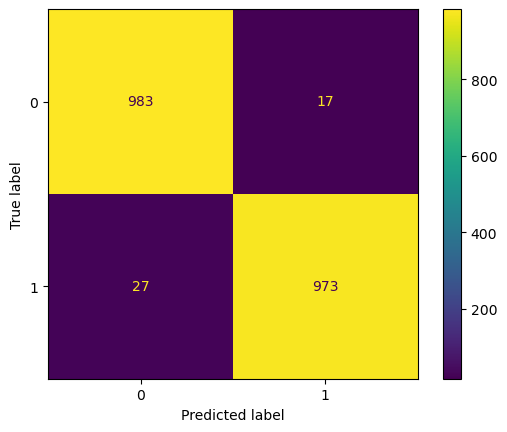

In [ ]:
import joblib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

#  Load only the best RandomForest model (not the GridSearchCV object)
best_rf_model = joblib.load("Trained_Models\RF_model_5CV_FinalModel1.pkl")

#  Predict
y_pred_rf = best_rf_model.predict(X_test)

#  Evaluate Model
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()




In [ ]:
train_accuracy = best_rf_model.score(X_train, y_train)
test_accuracy = best_rf_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Train Accuracy: 0.9846
Test Accuracy: 0.9780


In [ ]:
print(y_test.value_counts())


CLASS_LABEL
0    1000
1    1000
Name: count, dtype: int64
